https://www.kaggle.com/datasets/saisaathvik/used-bikes-prices-in-india?select=Used_Bikes.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv('Used_Bikes.csv')

In [3]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


## EDA

In [4]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [6]:
for i in df.columns:
    print(i," has unique values ",len(df[i].unique()))

bike_name  has unique values  471
price  has unique values  1232
city  has unique values  443
kms_driven  has unique values  3722
owner  has unique values  4
age  has unique values  35
power  has unique values  53
brand  has unique values  23


In [7]:
for i in df.columns:
    print(i," feature has data type",df[i].dtype)

bike_name  feature has data type object
price  feature has data type float64
city  feature has data type object
kms_driven  feature has data type float64
owner  feature has data type object
age  feature has data type float64
power  feature has data type float64
brand  feature has data type object


Text(0, 0.5, 'kilometer driven')

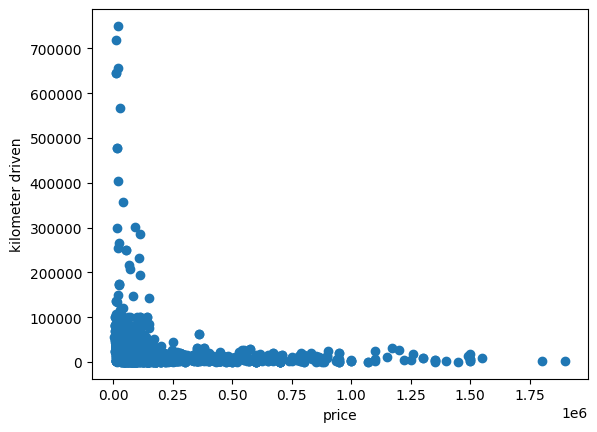

In [8]:
plt.scatter(df['price'],df['kms_driven'])
plt.xlabel('price')
plt.ylabel('kilometer driven')

## Feature Enginnering

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
df['bike_name']= le.fit_transform(df['bike_name'])
df['city']= le.fit_transform(df['city'])
df['owner']= le.fit_transform(df['owner'])
df['brand']= le.fit_transform(df['brand'])

In [12]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,401,35000.0,6,17654.0,0,3.0,110.0,19
1,295,119900.0,118,11000.0,0,4.0,350.0,17
2,411,600000.0,118,110.0,0,8.0,675.0,20
3,375,65000.0,44,16329.0,0,4.0,180.0,19
4,426,80000.0,44,10000.0,0,3.0,150.0,21


In [13]:
for i in df.columns:
    print(i," feature has data type",df[i].dtype)

bike_name  feature has data type int32
price  feature has data type float64
city  feature has data type int32
kms_driven  feature has data type float64
owner  feature has data type int32
age  feature has data type float64
power  feature has data type float64
brand  feature has data type int32


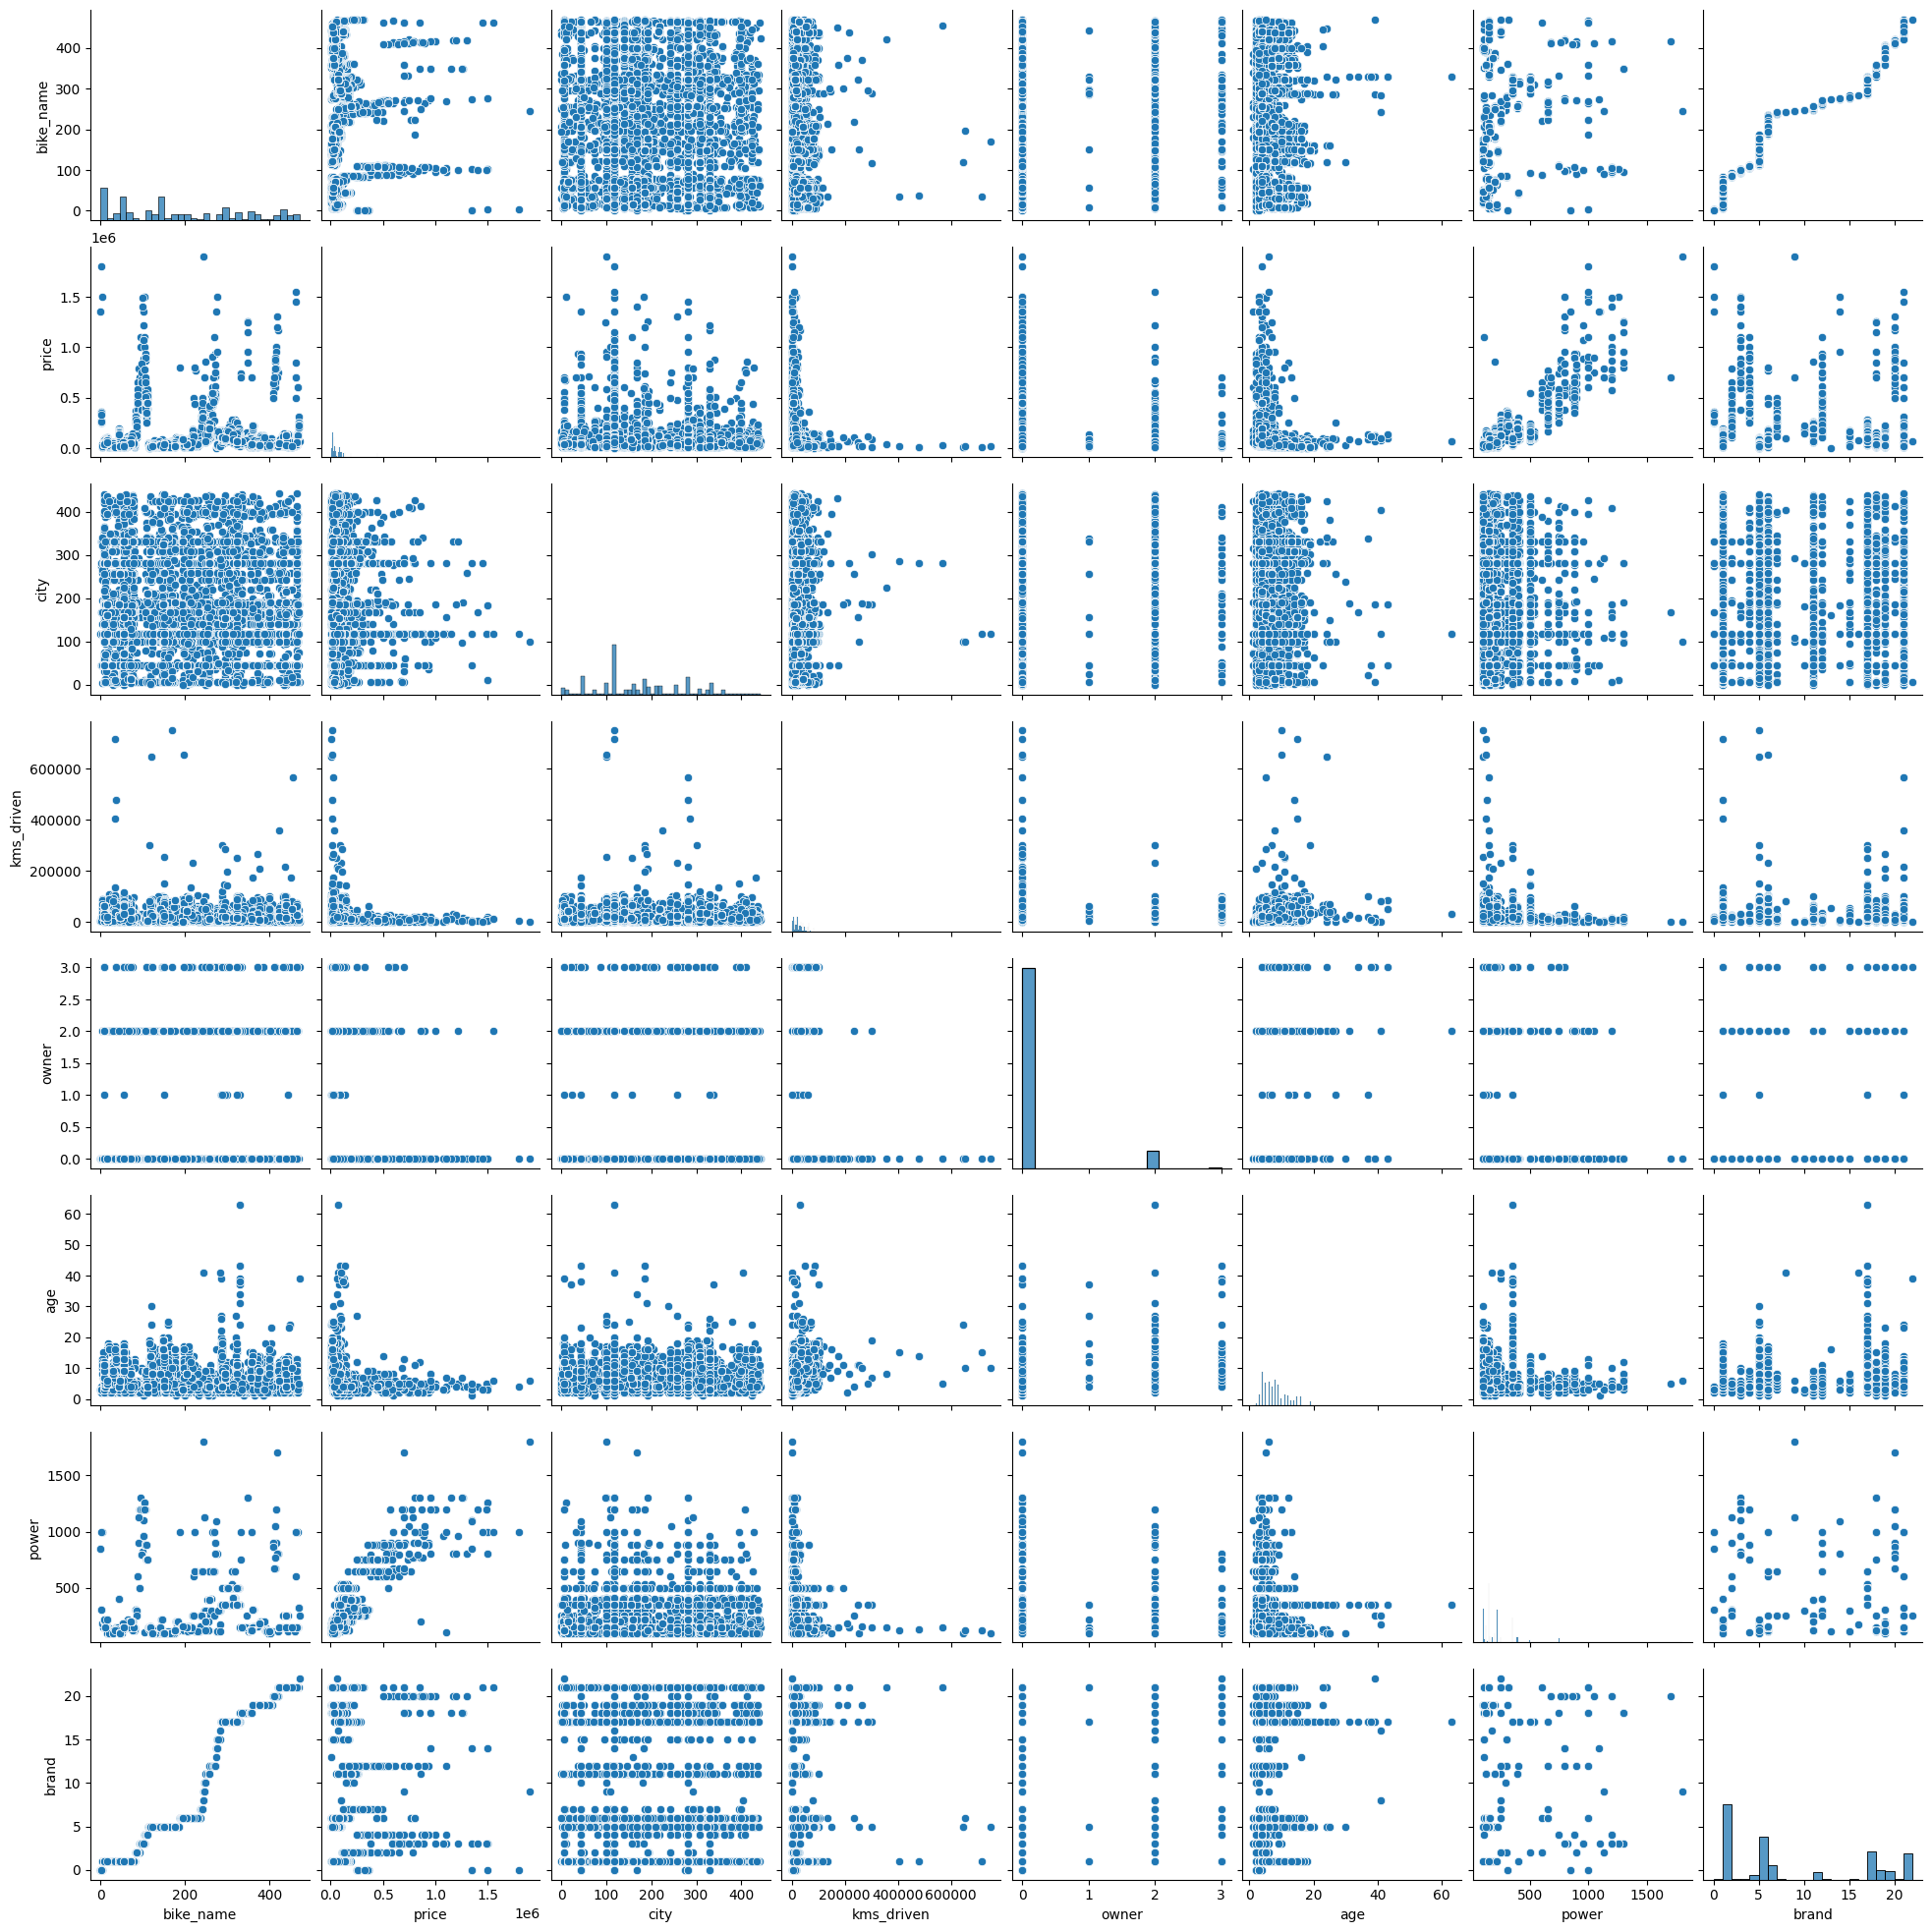

In [14]:
sns.pairplot(df)

## spliting data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x=df.drop(['price'],axis=1)
y=df['price']

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**Linear Regression**

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(pred , y_test))

0.7349943864295483


**Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [23]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)
print(r2_score(pred , y_test))

0.9211146463497003


## Applying Ada Boost Regressor

**keep default decision tree as base estimator because it is performing fine on this dataset**

In [24]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [37]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
pred = ab.predict(x_test)
print(r2_score(pred , y_test))

0.822938631121066


## Applying Ada Boost Regressor hyper parameters using GridSearchCV

In [26]:
params ={
    'n_estimators':[100,200],
    'learning_rate':[0.00001,0.0001,0.001,0.01,0.1,1.0],
    'loss':['linear', 'square', 'exponential']
}

In [27]:
ab = AdaBoostRegressor()
gs_ab = GridSearchCV( ab,param_grid=params,cv=5,scoring ='r2',verbose=3)

In [28]:
gs_ab.fit(x_train , y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=1e-05, loss=linear, n_estimators=100;, score=0.885 total time=   2.0s
[CV 2/5] END learning_rate=1e-05, loss=linear, n_estimators=100;, score=0.896 total time=   2.0s
[CV 3/5] END learning_rate=1e-05, loss=linear, n_estimators=100;, score=0.914 total time=   2.0s
[CV 4/5] END learning_rate=1e-05, loss=linear, n_estimators=100;, score=0.888 total time=   1.6s
[CV 5/5] END learning_rate=1e-05, loss=linear, n_estimators=100;, score=0.878 total time=   1.3s
[CV 1/5] END learning_rate=1e-05, loss=linear, n_estimators=200;, score=0.887 total time=   2.7s
[CV 2/5] END learning_rate=1e-05, loss=linear, n_estimators=200;, score=0.896 total time=   2.6s
[CV 3/5] END learning_rate=1e-05, loss=linear, n_estimators=200;, score=0.909 total time=   2.6s
[CV 4/5] END learning_rate=1e-05, loss=linear, n_estimators=200;, score=0.891 total time=   2.6s
[CV 5/5] END learning_rate=1e-05, loss=linear, n_estimators=200;,

[CV 4/5] END learning_rate=0.001, loss=exponential, n_estimators=100;, score=0.891 total time=   1.3s
[CV 5/5] END learning_rate=0.001, loss=exponential, n_estimators=100;, score=0.882 total time=   1.4s
[CV 1/5] END learning_rate=0.001, loss=exponential, n_estimators=200;, score=0.885 total time=   2.7s
[CV 2/5] END learning_rate=0.001, loss=exponential, n_estimators=200;, score=0.900 total time=   2.7s
[CV 3/5] END learning_rate=0.001, loss=exponential, n_estimators=200;, score=0.911 total time=   2.7s
[CV 4/5] END learning_rate=0.001, loss=exponential, n_estimators=200;, score=0.888 total time=   2.7s
[CV 5/5] END learning_rate=0.001, loss=exponential, n_estimators=200;, score=0.881 total time=   2.6s
[CV 1/5] END learning_rate=0.01, loss=linear, n_estimators=100;, score=0.888 total time=   1.2s
[CV 2/5] END learning_rate=0.01, loss=linear, n_estimators=100;, score=0.911 total time=   1.2s
[CV 3/5] END learning_rate=0.01, loss=linear, n_estimators=100;, score=0.910 total time=   1.3

[CV 4/5] END learning_rate=1.0, loss=square, n_estimators=200;, score=0.782 total time=   1.9s
[CV 5/5] END learning_rate=1.0, loss=square, n_estimators=200;, score=0.809 total time=   1.8s
[CV 1/5] END learning_rate=1.0, loss=exponential, n_estimators=100;, score=-0.034 total time=   0.9s
[CV 2/5] END learning_rate=1.0, loss=exponential, n_estimators=100;, score=0.616 total time=   1.0s
[CV 3/5] END learning_rate=1.0, loss=exponential, n_estimators=100;, score=0.325 total time=   1.0s
[CV 4/5] END learning_rate=1.0, loss=exponential, n_estimators=100;, score=0.706 total time=   1.0s
[CV 5/5] END learning_rate=1.0, loss=exponential, n_estimators=100;, score=0.476 total time=   0.9s
[CV 1/5] END learning_rate=1.0, loss=exponential, n_estimators=200;, score=-2.147 total time=   1.9s
[CV 2/5] END learning_rate=1.0, loss=exponential, n_estimators=200;, score=-0.527 total time=   1.9s
[CV 3/5] END learning_rate=1.0, loss=exponential, n_estimators=200;, score=-0.289 total time=   1.9s
[CV 4/

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                           1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=3)

In [30]:
print(gs_ab.best_score_)

0.8980601437446151


In [40]:
print(gs_ab.best_params_)

{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 200}
